## I). Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

## II). Importing Datasets

In [2]:
data_x = pd.read_csv("D:/Pramod Official/Projects/Internshala/DeepLearning/Assignment_4_data/Assignment_4_data/Movie_collection_Independent.csv")

In [3]:
data_y = pd.read_csv("D:/Pramod Official/Projects/Internshala/DeepLearning/Assignment_4_data/Assignment_4_data/Movie_collection_Target.csv")

## III). Looking shape and first five rows of both dataframes

In [4]:
print("Shape of data_x:", data_x.shape)
print("Shape of data_y:", data_y.shape)

Shape of data_x: (506, 19)
Shape of data_y: (506, 1)


In [5]:
print("First 5 rows of data_x:")
print(data_x.head())

First 5 rows of data_x:
   Marketin_expense  Production_expense  Multiplex_coverage     Budget  \
0           20.1264               59.62               0.462  36524.125   
1           20.5462               69.14               0.531  35668.655   
2           20.5458               69.14               0.531  39912.675   
3           20.6474               59.36               0.542  38873.890   
4           21.3810               59.36               0.542  39701.585   

   Movie_length  Lead_ Actor_Rating  Lead_Actress_rating  Director_rating  \
0         138.7               7.825                8.095            7.910   
1         152.4               7.505                7.650            7.440   
2         134.6               7.485                7.570            7.495   
3         119.3               6.895                7.035            6.920   
4         127.7               6.920                7.070            6.815   

   Producer_rating  Critic_rating  Trailer_views  Time_taken  Twitte

In [6]:
print("First 5 rows of data_y:")
print(data_y.head())

First 5 rows of data_y:
   Collection
0    2.266667
1    2.106667
2    2.980000
3    2.893333
4    3.080000


## IV). Calculating Shape of train, test and validation set

In [18]:
X_train, X_temp, y_train, y_temp = train_test_split(data_x, data_y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

print("Shape of training set:", X_train.shape)
print("Shape of validation set:", X_val.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (404, 19)
Shape of validation set: (81, 19)
Shape of test set: (21, 19)


## V). Standardizing the data

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## VI). Creating an CNN Model

In [9]:
model = keras.models.Sequential([
    keras.Input(shape=X_train_scaled.shape[1:]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

## VII). Compiling the Model

In [10]:
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.SGD(learning_rate=1e-2),
              metrics=['mae'])

## VIII). Training the Model for 100 epochs

In [11]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_val_scaled, y_val), verbose=0)

## IX). Evaluating the Model Performance on the test set

In [12]:
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print("Test loss:", test_loss)
print("Test MAE:", test_mae)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0838 - mae: 0.2414 
Test loss: 0.07827775925397873
Test MAE: 0.23601782321929932


In [13]:
# Evaluating model performance on test set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss:.2f}')
print(f'Test MAE: {test_mae:.2f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0838 - mae: 0.2414 
Test Loss: 0.08
Test MAE: 0.24


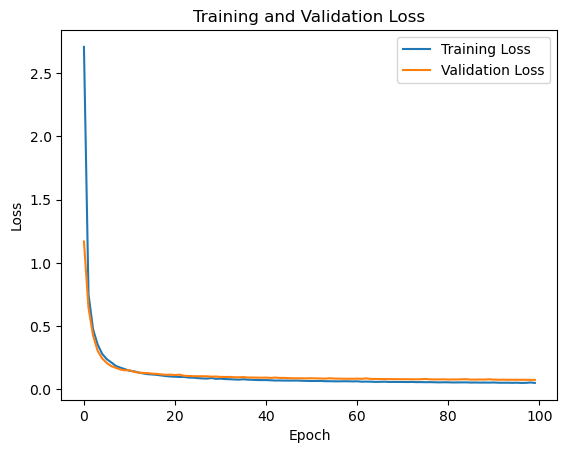

In [14]:
# Plotting loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

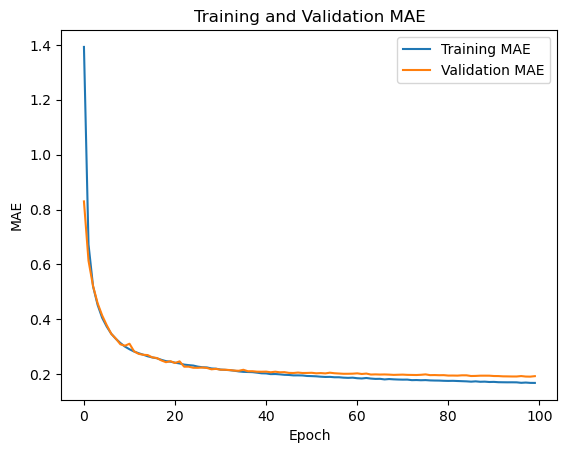

In [15]:
# Plotting MAE curves
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

## X). Predicting the values of the first 5 test records

In [16]:
predictions = model.predict(X_test_scaled[:5])
print('Predictions:', predictions.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predictions: [1.87721   2.2368326 3.2721593 2.5562286 3.613384 ]
